Lockstar - SinglePIDController - Basic Client

In [1]:
from os.path import join,dirname,abspath
import numpy as np
import matplotlib.pyplot as plt
import asyncio
asyncio.get_event_loop()

<_WindowsSelectorEventLoop running=True closed=False debug=False>

In [2]:
from lockstar_client.SinglePIDClient import SinglePIDClient
from lockstar_client.AWGClient import AWGClient
from lockstar_client.LinearizationClient import LinearizationClient

# Single PID Client

In [ ]:
#connect to client
pid_client = SinglePIDClient('192.168.88.220', 10780, 1234)
await pid_client.initialize(1,2,3,4,5, True, 0, 1)
if await pid_client.register_client_id():
     print(f'Successfully initialized single PID module')

In [ ]:
await pid_client.set_output_limits(min=0, max=10)

In [ ]:
await pid_client.set_pid(p=1, i=0, d=0)

In [ ]:
await pid_client.lock()

In [ ]:
await pid_client.unlock()

# Linearization Client

In [5]:
lin_client = LinearizationClient('192.168.88.220', 10780, 1234)
if await lin_client.register_client_id():
     print(f'Successfully initialized Linearization module')

Successfully initialized Linearization module


[[0.0001562523830216378, 0.0, 0.0003125047660432756, 0.0003125047660432756, 0.0003125047660432756, 0.0001562523830216378, 0.0001562523830216378, 0.0003125047660432756, 0.0001562523830216378, 0.0003125047660432756, 0.0001562523830216378, 0.0001562523830216378, 0.0003125047660432756, 0.0003125047660432756, 0.0001562523830216378, 0.0001562523830216378, 0.0001562523830216378, 0.0001562523830216378, 0.0001562523830216378, 0.0003125047660432756, 0.0001562523830216378, 0.0, 0.0003125047660432756, 0.0003125047660432756, 0.0001562523830216378, 0.0001562523830216378, 0.0003125047660432756, 0.0001562523830216378, 0.0001562523830216378, 0.0006250095320865512, 0.0, 0.0001562523830216378, 0.0004687571490649134, 0.0004687571490649134, 0.0, 0.0003125047660432756, 0.0001562523830216378, 0.0001562523830216378, 0.0001562523830216378, 0.0003125047660432756, 0.0003125047660432756, 0.0003125047660432756, 0.0001562523830216378, 0.0, 0.0003125047660432756, 0.0004687571490649134, 0.0003125047660432756, 0.00031

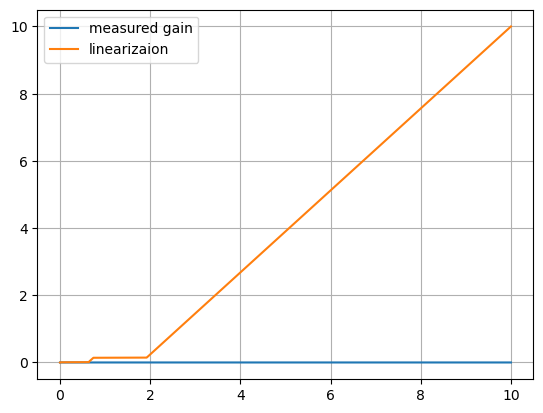

In [10]:
ramp_start = 0.
ramp_end = 10.
ramp_length = 2000
settling_time_ms = 1

linearization_file = join(dirname(abspath('')), 'test_linearization.json')
# print(await lin_client.set_linearization_length_one(ramp_length))
# print(await lin_client.set_linearization_one_from_file(linearization_file))
# sys.exit()
ramp = np.linspace(ramp_start, ramp_end, num=ramp_length)

_ = await lin_client.set_ramp_parameters(ramp_start, ramp_end, ramp_length, settling_time_ms)
linearization_response = await lin_client.linearize_ch_one()

if linearization_response != False:
    measured_gain, linearization = linearization_response
    fig,ax = plt.subplots(1,1)
    ax.plot(ramp,measured_gain,label='measured gain')
    ax.plot(ramp,linearization,label='linearizaion')
    ax.legend()
    ax.grid('lightgray')
    plt.show()

    _ = await lin_client.store_linearization_locally(linearization, ramp_start, ramp_end, linearization_file)

    _ = await lin_client.set_linearization_length_one(ramp_length)
    #_ = await lin_client.set_linearization_one(linearization, min_output_voltage=ramp_start, max_output_voltage=ramp_end)
    _ = await lin_client.set_linearization_one_from_file(linearization_file)
    

# AWG Client

In [3]:
awg_client = AWGClient('192.168.88.220', 10780, 1234)
await awg_client.initialize()
if await awg_client.register_client_id():
    print(f'Successfully initialized AWG module')

Successfully initialized AWG module


In [4]:
linearization_file = join(dirname(abspath('')), 'test_linearization.json')
linearization_length = 2000

sampling_rate = 1000

ch_one_chunks = [1999]
ch_one_buffer = np.linspace(0, 10, num=2000).tolist()
ch_two_chunks = [0]
ch_two_buffer = [0.]
print(await awg_client.initialize_buffers(len(ch_one_buffer), 1, len(ch_one_chunks), 1, sampling_rate))
print(await awg_client.set_ch_one_output_limits(0, 10))
print(await awg_client.set_ch_two_output_limits(0, 10))
print(await awg_client.set_ch_one_chunks(ch_one_chunks))
print(await awg_client.set_ch_two_chunks(ch_two_chunks))
print(await awg_client.set_ch_one_buffer(ch_one_buffer))
print(await awg_client.set_ch_two_buffer(ch_two_buffer))

print(await awg_client.set_linearization_length_one(linearization_length))
print(await awg_client.set_linearization_one_from_file(linearization_file))

ACK
ACK
ACK
ACK
ACK
ACK
ACK
ACK
NACK
